# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**<span style="color:red">Warm suggestion: by using the 1D representation</span>** (but you can work with the representation you prefer or the one you are able to invent) ...

### Exercise 09.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path in cartesian coordinates</span>

---

### Travelling salesman su circonferenza unitaria

Si considera il problema del commesso viaggiatore su circonferenza unitaria, per cui le città che bisogna visitare sono estratte casualmente per l'appunto su una circonferenza unitaria. I punti su tale circonferenza che vengono generati devono essere quindi visitati una e una sola volta, tranne per il punto di partenza, che deve coincidere con il punto di arrivo. Di seguito si ha un grafico dei suddetti punti, in cui la stella rappresenta il punto di partenza (e di arrivo) del commesso viaggiatore.

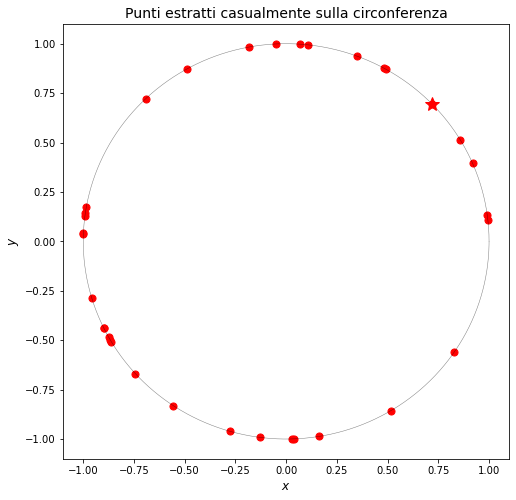

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

points = np.loadtxt('Circle/points_circumference.dat')

# Estraggo dei punti sulla circonferenza unitaria da plottare in grigio
M=5000                         
np.random.seed(0)     
r = 2*np.pi*np.random.rand(M) 
r.sort()
x_cirle = np.cos(r)
y_cirle = np.sin(r)


plt.figure(figsize=(8,8))

# Plotto la circonferenza
plt.plot(x_cirle,y_cirle, linestyle ='-', color ='black',alpha=0.5,linewidth=0.5)

plt.title('Punti estratti casualmente sulla circonferenza', fontsize=14)

# Plotto i punti corrispondenti alle città
plt.scatter(points[:, 0], points[:, 1], s=50, color='red')
plt.plot(points[0, 0], points[0, 1],'*', markersize=14, color='red')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)

plt.show()

Il problema dell'ottimizzazione del percorso può essere risolto utilizzando un algoritmo genetico. In particolare sono stati generati 1000 "cromosomi", che altro non sono che vettori contenenti tutti gli interi compresi tra 1 e 34, una e una sola volta. Si può constatare che un particolare cromosoma siffatto codifica la soluzione: l'ordine in cui appaiono gli interi che vanno da 1 a 34 indicano l'ordine in cui il commesso viaggiatore deve visitare le 34 città per minimizzare il percorso.

In particolare, il procedimento per cui viene implementato l'algoritmo genetico è il seguente:

1. Vengono generati 1000 cromosomi contenenti gli interi compresi tra 1 e 34 in ordine, per poi ognuno vedere i propri indici mischiati in modo casuale.

2. Vengono slvati i punti sulla circonferenza generati casualmente, per cui ogni intero sarà associato al suo punto sulla circonferenza unitaria: così facendo sarà possibile calcolare la Loss Function associata al singolo cromosoma:

$$L(\vec{x}_{1},\vec{x}_{2},...\vec{x}_{34})=\Bigg(\sum_{i=1}^{33}\big|\,\vec{x}_{i+1}-\vec{x}_{i}\,\big|\Bigg) + \big|\,\vec{x}_{34}-\vec{x}_{1}\,\big|\,\,.$$

3. Si costruisce una nuova popolazione di 1000 cromosomi: vengono ordinati i cromosomi in ordine decrescente di Loss Function, per cui si scelogono due cromosomi relativamente "buoni" (questi vengono scelti estraendo i numeri casuali $u,v = 1000\,(r^{0.2})$, dove $r\in\mathcal{U}[0,1]$, che indicizzano i cromosomi ordinati), che eventualmente subiscono crossover e mutazione, e vengono inseriti nella nuova popolazione. Questo procedimento viene iterato finchè la nuova popolazione non conta nuovi 1000 esemplari.

4. Il procedimento viene iterato generando 500 epoche, ovvero 500 nuove popolazioni di cromosomi, finchè dopo l'ultima iterazione si sceglie finalmente il cromosoma a cui è ssociata la Loss Function minore, che dovrebbe codificare la soluzione, ovvero il percorso minimizzato.

Il crossover fra due cromosomi è un operazione che prende due cromosomi genitori, e restituisce due cromosomi figli che abbiano una struttura ereditata ognuno da entrambi i genitori. In questo caso due cromosomi hanno il $75\%$ di probabilità di essere soggetti a crossover, per cui si genera un punto di crossover $n_c < N$, dove $N=34$ è la dimensione del cromosoma, per cui i primi $n_c$ indici dei cromosomi genitori sono copiati sui cromosomi figli, dopodichè sul figlio 1 vengono copiati i valori mancanti presi in ordine dal genitore 2, ed analogamente vengono copiati i valori mancanti sul figlio 2 presi in ordine dal genitore 1.

Se due cromosomi sono soggetti a crossover, per cui vengono generati due cromosomi figli, questi hanno una probabilità del $20\%$ di essere soggetti anche ad una mutazione. Sono stati implementati quattro tipologie di mutazioni:

- `Mutation1` scambia due indici casuali del cromosoma;
- `Mutation2` scegli casualmente gli ultimi $m$ indici del cromosoma, e implementa uno spostamento casuale di $n$ a sinistra dei suddetti indici;
- `Mutation3` scambia due blocchi di indici consecutivi presi casualmente all'interno del cromosoma, e di lunghezza casuale;
- `Mutation4` inverte le città in un blocco all'interno del cromosoma scelto casualmente, di lunghezza casuale.

Di seguito si ha il confronto fra il percorso iniziale arbitrario e il percorso ottimizzato seguito dal commesso viaggiatore.

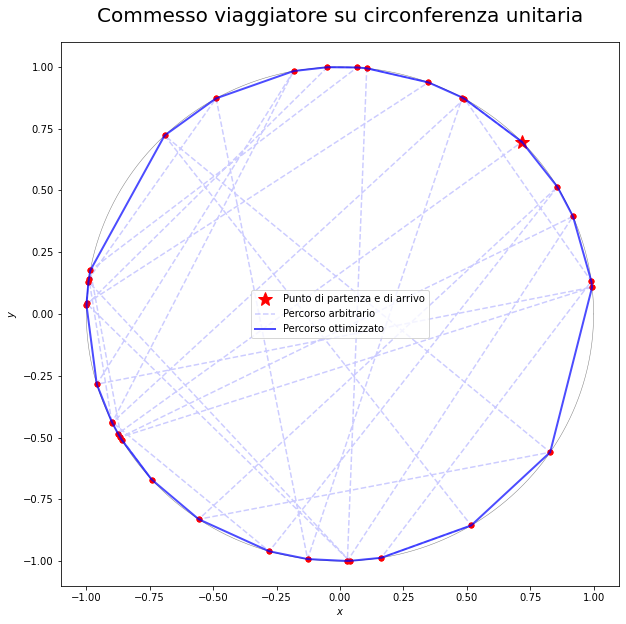

In [4]:
position0 = np.loadtxt('Circle/result_circumference.dat')
position00 = np.loadtxt('Circle/points_circumference.dat')

# Estraggo dei punti sulla circonferenza unitaria da plottare in grigio
M=5000                         
np.random.seed(0)     
r = 2*np.pi*np.random.rand(M) 
r.sort()
x_cirle = np.cos(r)
y_cirle = np.sin(r)

# Plotto la circonferenza unitaria
plt.figure(figsize=(10,10))
plt.title("Commesso viaggiatore su circonferenza unitaria", fontsize=20, pad=20)
plt.plot(x_cirle,y_cirle, linestyle ='-', color ='black',alpha=0.5,linewidth=0.5)

# Estraggo i vettori delle x e delle y del percorso arbitrario iniziale
x0 = position00[:, 0]
y0 = position00[:, 1]
x0 = np.append(x0,x0[0])
y0 = np.append(y0,y0[0])

# Plotto i punti estratti sulla circonferenza come punti rossi
for i in range(len(position00)):
    plt.plot(x0[i], y0[i], color='red',marker='.',markersize=10)

# Plotto i punti estratti sulla circonferenza come punti rossi
for i in range(len(position00)):
    plt.plot(x0[i], y0[i], color='red',marker='.',markersize=10)
    
# Marco il punto iniziale a forma di stella
plt.plot(x0[0],y0[0],'*', markersize=14, label='Punto di partenza e di arrivo',color='red') 

# Collego i punti del percorso arbitrario con una linea tratteggiata
plt.plot(x0,y0, label= "Percorso arbitrario",color='blue', linestyle='--',alpha =0.2)

#Percorso finale 
x = position0[:, 0]
y = position0[:, 1]
x = np.append(x,x[0])
y = np.append(y,y[0])

# Collego i punti del percorso ottimizzato con una linea continua
plt.plot(x,y, label= "Percorso ottimizzato",color='blue', linewidth=2,alpha=0.7)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

Si osserva la validità della soluzione fornita dall'algoritmo genetico: il percorso migliore è sicuramente quello che segue la circonferenza.

Di seguito si ha il grafico del minimo della Loss Function e della media di questa in funzione dell'epoca.

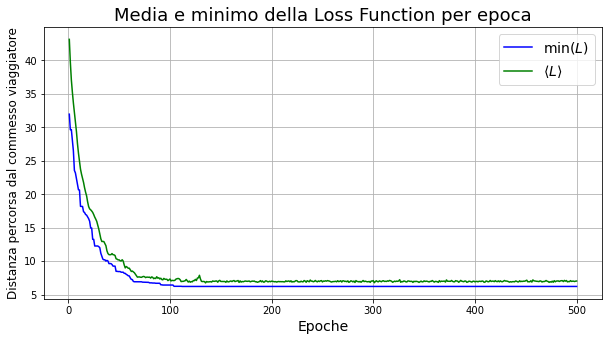

In [5]:
data_min = np.loadtxt('Circle/min_loss_function_c.dat')
data_mean = np.loadtxt('Circle/mean_loss_function_c.dat')

epochs = data_min[:, 0]
min_lf = data_min[:, 1]
mean_lf = data_mean[:, 1]

plt.figure(figsize=(10,5))
plt.title("Media e minimo della Loss Function per epoca",fontsize=18)
plt.plot(epochs, min_lf, color='blue', label='$\min(L)$')
plt.plot(epochs, mean_lf, color='green', label=r'$ \langle {L} \rangle  $')
plt.ylabel('Distanza percorsa dal commesso viaggiatore',fontsize=12)
plt.xlabel("Epoche",fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)

plt.show()

Si nota che già da poco dopo la centesima epoca è raggiunta la Loss Function minima che caraterizza il risultato.

---

### Travelling salesman sul piano

Si considera ora il problema del commesso viaggiatore su un piano, in cui le città sono generate casualmente all'interno di un quadrato di raggio 2. Di seguito si ha un grafico dei suddetti punti, in cui la stella rappresenta il punto di partenza (e di arrivo) del commesso viaggiatore. Il punto di partenza (e di arrivo) è sempre indicato con un simbolo stella.

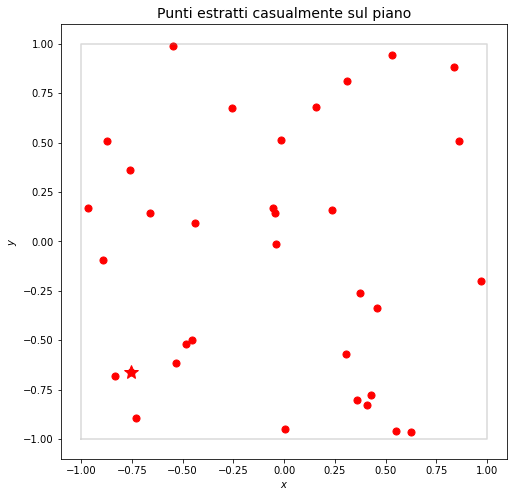

In [6]:
points = np.loadtxt('Plane/points_plane.dat')

x_q = [-1, 1, 1, -1, -1]
y_q = [-1, -1, 1, 1, -1]

plt.figure(figsize=(8,8))
plt.title('Punti estratti casualmente sul piano', fontsize=14)

# Plotto il quadrato di lato 2
plt.plot(x_q, y_q, color='grey', alpha=0.3)

# Plotto i punti corrispondenti alle città
plt.scatter(points[:, 0], points[:, 1], s=50, color='red')
plt.plot(points[0, 0], points[0, 1],'*', markersize=14, color='red')

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.show()

Mediante lo stesso procedimento seguito per i punti generati sulla circonferenza, si utilizza l'algoritmo genetico per minimizzare il percorso effettuato dal commeso viaggiatore per visitare tutti i punti una e una sola volta.

Di seguito si ha il confronto fra il percorso iniziale arbitrario e il percorso ottimizzato seguito dal commesso viaggiatore.

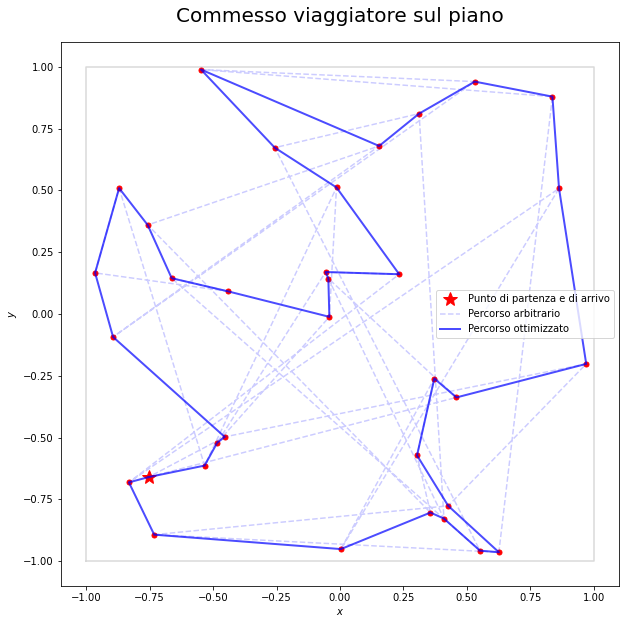

In [7]:
position0 = np.loadtxt('Plane/result_plane.dat')
position00 = np.loadtxt('Plane/points_plane.dat')

plt.figure(figsize=(10,10))
plt.title("Commesso viaggiatore sul piano", fontsize=20, pad=20)

# Plotto il quadrato di lato 2
plt.plot(x_q, y_q, color='grey', alpha=0.3)

# Estraggo i vettori delle x e delle y del percorso arbitrario iniziale
x0 = position00[:, 0]
y0 = position00[:, 1]
x0 = np.append(x0,x0[0])
y0 = np.append(y0,y0[0])

# Plotto i punti estratti sul piano come punti rossi
for i in range(len(position00)):
    plt.plot(x0[i], y0[i], color='red',marker='.',markersize=10)
    
# Marco il punto iniziale a forma di stella
plt.plot(x0[0],y0[0],'*', markersize=14, label='Punto di partenza e di arrivo',color='red') 

# Collego i punti del percorso arbitrario con una linea tratteggiata
plt.plot(x0,y0, label= "Percorso arbitrario",color='blue', linestyle='--',alpha =0.2)

#Percorso finale 
x = position0[:, 0]
y = position0[:, 1]
x = np.append(x,x[0])
y = np.append(y,y[0])

# Collego i punti del percorso ottimizzato con una linea continua
plt.plot(x,y, label= "Percorso ottimizzato",color='blue', linewidth=2,alpha=0.7)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

In questo caso non si può essere sicuri se il risultato estrapolato è quello giusto, tuttavia si osserva un netto miglioramento rispetto al prcorso iniziale.

Di seguito si ha il grafico del minimo della Loss Function e della media di questa in funzione dell'epoca.

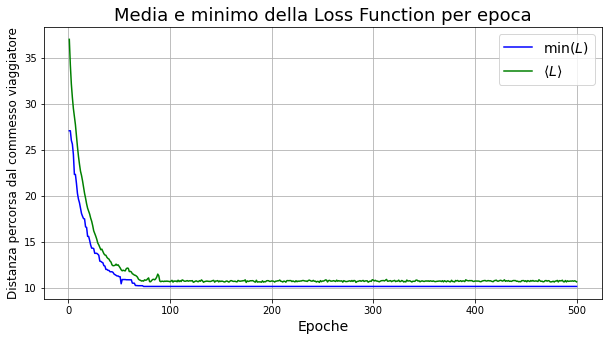

In [8]:
data_min = np.loadtxt('Plane/min_loss_function_p.dat')
data_mean = np.loadtxt('Plane/mean_loss_function_p.dat')

epochs = data_min[:, 0]
min_lf = data_min[:, 1]
mean_lf = data_mean[:, 1]

plt.figure(figsize=(10,5))
plt.title("Media e minimo della Loss Function per epoca",fontsize=18)
plt.plot(epochs, min_lf, color='blue', label='$\min(L)$')
plt.plot(epochs, mean_lf, color='green', label=r'$ \langle {L} \rangle  $')
plt.ylabel('Distanza percorsa dal commesso viaggiatore',fontsize=12)
plt.xlabel("Epoche",fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)

plt.show()

Si nota anche in questo caso che già da poco dopo la centesima epoca è raggiunta la Loss Function minima che caraterizza il risultato. Da ciò si può ipotizzare che il risultato ottenuto sia effettivamente quello corretto.